In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.datasets import make_classification, make_blobs

from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
# Load the cancer data
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)
clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC classifier on training set: 0.93
Accuracy of Linear SVC classifier on test set: 0.95


In [27]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)


clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.63


Breast cancer dataset (normalized with MinMax scaling)


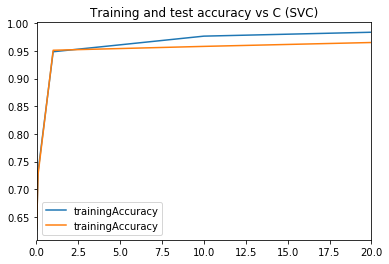

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
   
print('Breast cancer dataset (normalized with MinMax scaling)')
trainingAccuracy=[]
testAccuracy=[]
for C1 in [.01,.1, 1, 10, 20]:
    clf = SVC(C=C1).fit(X_train_scaled, y_train)
    acctrain=clf.score(X_train_scaled, y_train)
    accTest=clf.score(X_test_scaled, y_test)
    trainingAccuracy.append(acctrain)
    testAccuracy.append(accTest)
    
# Create a dataframe
C1=[.01,.1, 1, 10, 20]   
trainingAccuracy=pd.DataFrame(trainingAccuracy,index=C1)
testAccuracy=pd.DataFrame(testAccuracy,index=C1)

# Plot training and test R squared as a function of alpha
df=pd.concat([trainingAccuracy,testAccuracy],axis=1)
df.columns=['trainingAccuracy','trainingAccuracy']

fig5=df.plot()
fig5=plt.title('Training and test accuracy vs C (SVC)')
plt.show()

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_cancer)


param_range = np.logspace(-3, 2, 20)
train_scores, test_scores = validation_curve(SVC(), X_scaled, y_cancer,
                                            param_name='gamma',
                                            param_range=param_range, cv=10)

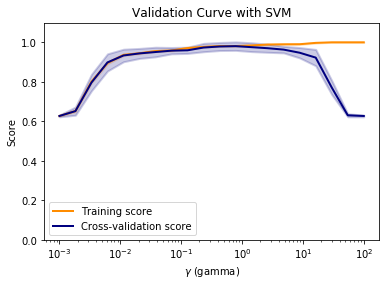

In [50]:
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

[0.62743204164256805, 0.62743204164256805, 0.62743204164256805, 0.62743204164256805, 0.62743204164256805, 0.62743204164256805, 0.62743204164256805, 0.67442163100057839, 0.82643531906689804, 0.90904472720262197, 0.93848756506651243, 0.94815403894351269, 0.95694042799305967, 0.96264989396568335, 0.9740746096009254, 0.97715249662618076, 0.97891170233275493, 0.98110854058222485, 0.98154617312512049, 0.98286678234046665]
[0.6276665114112715, 0.6276665114112715, 0.6276665114112715, 0.6276665114112715, 0.6276665114112715, 0.6276665114112715, 0.62943642291569624, 0.66817264399937903, 0.81569632044713547, 0.90170780934637484, 0.92451482689023445, 0.93854991460953274, 0.94732184443409406, 0.9508461419034312, 0.96135693215339235, 0.97189877348237841, 0.97365315944729081, 0.97540754541220309, 0.97540754541220309, 0.9683744760130415]


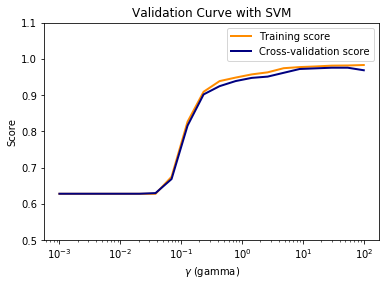

In [39]:
# Load the cancer data
from sklearn.cross_validation import  KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
param_range = np.logspace(-3, 2, 20)
folds=5
overallTrainAccuracy=[]
overallTestAccuracy=[]
for c in  param_range:
    trainingAccuracy=0
    testAccuracy=0
    kf = KFold(len(X_cancer),n_folds=folds)
    for train_index, test_index in kf:
            # Partition the data acccording the fold indices generated
            X_train, X_test = X_cancer[train_index], X_cancer[test_index]
            y_train, y_test = y_cancer[train_index], y_cancer[test_index]  

            
            # Scale the X_train and X_test 
            scaler = MinMaxScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            
            clf = SVC(C=c).fit(X_train_scaled, y_train)
            acctrain=clf.score(X_train_scaled, y_train)
            accTest=clf.score(X_test_scaled, y_test)
            trainingAccuracy += np.sum(acctrain)
            testAccuracy += np.sum(accTest)
    overallTrainAccuracy.append(trainingAccuracy/folds)
    overallTestAccuracy.append(testAccuracy/folds)
        
print(overallTrainAccuracy)
print(overallTestAccuracy)
    
overallTrainAccuracy=pd.DataFrame(overallTrainAccuracy,index=param_range)
overallTestAccuracy=pd.DataFrame(overallTestAccuracy,index=param_range)

# Plot training and test R squared as a function of alpha
df=pd.concat([overallTrainAccuracy,overallTestAccuracy],axis=1)
df.columns=['trainingAccuracy','testAccuracy']


plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.5, 1.1)
lw = 2

plt.semilogx(param_range, overallTrainAccuracy, label='Training score',
            color='darkorange', lw=lw)


plt.semilogx(param_range, overallTestAccuracy, label='Cross-validation score',
            color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

In [20]:
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
kf = KFold(len(X_cancer),n_folds=folds)

X_cancer.shape

(569, 30)

In [42]:
X_train.shape
X_test.shape

(113, 30)